## Problem Statement


   An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

The company requires  to build a model wherein we need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# 1: Data Preparation ( Importing data)

In [237]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


In [238]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [239]:
# Importing all datasets
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [240]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [241]:
leads_data.shape

(9240, 37)

In [242]:
# let's look at the statistical aspects of the dataframe
leads_data.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


#### Checking null columns and dropping the columns which are not significant

In [243]:
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [244]:
## Check out the null percentage 
perecent_null = leads_data.isnull().sum() * 100 / len(leads_data) 

In [245]:
perecent_null

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [246]:
perecent_null[perecent_null> 30]


Tags                           36.287879
Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

In [247]:

leads_data.drop(columns=pd.DataFrame(perecent_null[perecent_null> 30]).reset_index()['index'],axis=1,inplace=True)

In [248]:
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [249]:
leads_data.shape

(9240, 31)

#### Identifying the data where there is no variation in data , these columns would not give us enough insights for our study

 Identify and dropping the columns where there is no homogenety in data

In [250]:
(leads_data['Converted'].value_counts() / len(leads_data)) * 100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

In [251]:
        percentage_values = (leads_data['TotalVisits'].value_counts() / len(leads_data)) * 100
        percentage_values = pd.DataFrame(percentage_values).reset_index()
        percentage_values.columns = ['value','count']
        percentage_values

,value,count
0,0.0,23.690476
1,2.0,18.181818
2,3.0,14.134199
3,4.0,12.121212
4,5.0,8.474026
5,6.0,5.043290
6,1.0,4.274892
7,7.0,3.344156
8,8.0,2.424242
9,9.0,1.774892


In [252]:
len(percentage_values[percentage_values['count'] > 90] )

0

In [253]:
###getting the percentage of values in each column
for column in leads_data.columns:
        percentage_values = (leads_data[column].value_counts() / len(leads_data)) * 100
        percentage_values = pd.DataFrame(percentage_values).reset_index()
        percentage_values.columns = ['value','count']
        percentage_values

        if len(percentage_values[percentage_values['count'] > 90] )  :
            print(f"dropping the column '{column}' as it contains same value for 90% of the data " )
            leads_data.drop(columns=[column],axis=1,inplace=True)

dropping the column 'Do Not Email' as it contains same value for 90% of the data 
dropping the column 'Do Not Call' as it contains same value for 90% of the data 
dropping the column 'Search' as it contains same value for 90% of the data 
dropping the column 'Magazine' as it contains same value for 90% of the data 
dropping the column 'Newspaper Article' as it contains same value for 90% of the data 
dropping the column 'X Education Forums' as it contains same value for 90% of the data 
dropping the column 'Newspaper' as it contains same value for 90% of the data 
dropping the column 'Digital Advertisement' as it contains same value for 90% of the data 
dropping the column 'Through Recommendations' as it contains same value for 90% of the data 
dropping the column 'Receive More Updates About Our Courses' as it contains same value for 90% of the data 
dropping the column 'Update me on Supply Chain Content' as it contains same value for 90% of the data 
dropping the column 'Get updates o

In [254]:
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [255]:
leads_data.shape

(9240, 18)

In [256]:
# Get the value counts of rest of the columns
i=0
for column in leads_data:
    i=i+1
    print(leads_data[column].astype('category').value_counts())
    print( '--------------column -----------------',(i), '------------------------------------------------')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
--------------column ----------------- 1 ------------------------------------------------
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
--------------column ----------------- 2 ------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick 

In [257]:
leads_data.shape

(9240, 18)

### Dropping column with select as a value

In [258]:

count = {}
dropped_columns = []
for column in leads_data.columns :
    count[column] =  (len(leads_data[leads_data[column].apply(lambda x : str(x).strip().lower() == "select") ]) / len(leads_data)) * 100
    
    if count[column] > 30 : 
        print(column)
        leads_data.drop(columns=[column],axis=1 ,inplace=True)
        dropped_columns.append(column)

 

How did you hear about X Education
Lead Profile


In [259]:
len(leads_data[leads_data['City'].apply(lambda x : str(x).strip().lower() == "select") ]) / len(leads_data)

0.2433982683982684

In [260]:
len(leads_data['City'])

9240

In [261]:
(leads_data.isnull().sum() / len(leads_data)) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
City                                             15.367965
A free copy of Mastering The Interview            0.000000
Last Notable Activity                             0.000000
dtype: float64

In [262]:
leads_data.shape

(9240, 16)

In [263]:
removed_columns = ['How did you hear about X Education','Lead Profile']
for column in count:
    if count[column] > 0 and column not in removed_columns :
        print(column , (len(leads_data[leads_data[column].apply(lambda x : str(x).strip().lower() == "select") ]) / len(leads_data)) * 100)


Specialization 21.017316017316016
City 24.339826839826838


In [264]:
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
What is your current occupation                  2690
What matters most to you in choosing a course    2709
City                                             1420
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [265]:
leads_data.shape

(9240, 16)

In [266]:
leads_data['What matters most to you in choosing a course'].value_counts()


Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [267]:
leads_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

### Dropping 'What matters most to you in choosing a course' and  removing null values from 'What is your current occupation'

In [268]:
leads_data.drop(columns=['What matters most to you in choosing a course'],axis=1,inplace=True)

In [269]:
leads_data = leads_data[~(leads_data['What is your current occupation'].isnull())]

In [270]:
leads_data.info

<bound method DataFrame.info of                                Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9234  c0b25922-511f-4c56-852e-ced210a45447       579615   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source  Converted  TotalVisits  \
0                         API      Olark Chat          0          0.0   
1                         API  Organic Search          0          5.0   
2     Landing Page Submission  Direct Tr

In [271]:
leads_data.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Converted                                    0
TotalVisits                                130
Total Time Spent on Website                  0
Page Views Per Visit                       130
Last Activity                              103
Country                                   1605
Specialization                              18
What is your current occupation              0
City                                         0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [272]:
leads_data.drop(columns=['Country','City'],inplace=True,axis=1)

In [273]:
leads_data.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

#### Filtering records will null values

In [274]:
leads_data = leads_data[~(leads_data['Lead Source'].isnull())]
leads_data = leads_data[~(leads_data['Specialization'].isnull())]
leads_data = leads_data[~pd.isnull(leads_data['TotalVisits'])]

In [275]:
leads_data.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#### We don't need prospect id and lead number 

In [276]:
leads_data.drop(columns=['Prospect ID','Lead Number'],axis=1,inplace=True)

#### Graphical analysis

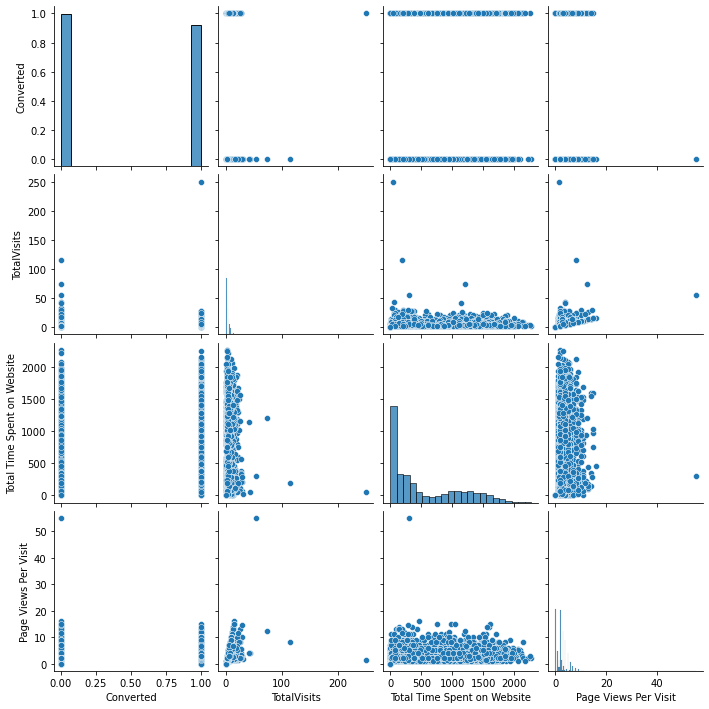

In [277]:
import seaborn as sns
sns.pairplot(data=leads_data)

In [278]:
from sklearn.preprocessing import StandardScaler

std_scalar = StandardScaler()
scaled_leads_data = pd.DataFrame(std_scalar.fit_transform(leads_data[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]))
scaled_leads_data.columns = ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']


In [279]:
scaled_leads_data

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,-0.962570,-0.717924,-0.946746,-1.144551
1,-0.962570,0.272536,0.245477,0.009014
2,1.038885,-0.321740,1.763173,-0.221699
3,-0.962570,-0.519832,-0.407239,-0.683125
4,1.038885,-0.321740,1.579210,-0.683125
...,...,...,...,...
6368,1.038885,0.272536,-0.575282,0.009014
6369,1.038885,0.866812,2.316832,0.087457
6370,-0.962570,-0.321740,-0.525754,-0.221699
6371,-0.962570,-0.321740,-0.594740,-0.221699


#### Creating dummy variable, dropping the original column and merging the dataframe

In [280]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source',  'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads_data = pd.concat([leads_data, dummy], axis=1)

In [281]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads_data['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads_data = pd.concat([leads_data, dummy_spl], axis = 1)

In [282]:
leads_data

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,Select,Unemployed,No,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.50,Email Opened,Select,Unemployed,No,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,Select,Unemployed,No,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,1,5.0,210,2.50,SMS Sent,Business Administration,Unemployed,No,...,0,0,0,0,0,0,0,0,0,0
9235,Landing Page Submission,Direct Traffic,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,No,...,1,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Yes,...,0,0,0,1,0,0,0,0,0,0
9237,Landing Page Submission,Direct Traffic,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Yes,...,0,0,0,0,0,0,0,0,0,0


In [283]:
# Drop the variables for which the dummy variables have been created

leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [284]:
# Import the required library

from sklearn.model_selection import train_test_split
# Put all the feature variables in X

X = leads_data.drop(['Converted'], 1)
X.head()
y = leads_data['Converted']

In [285]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##### Find out correlation 

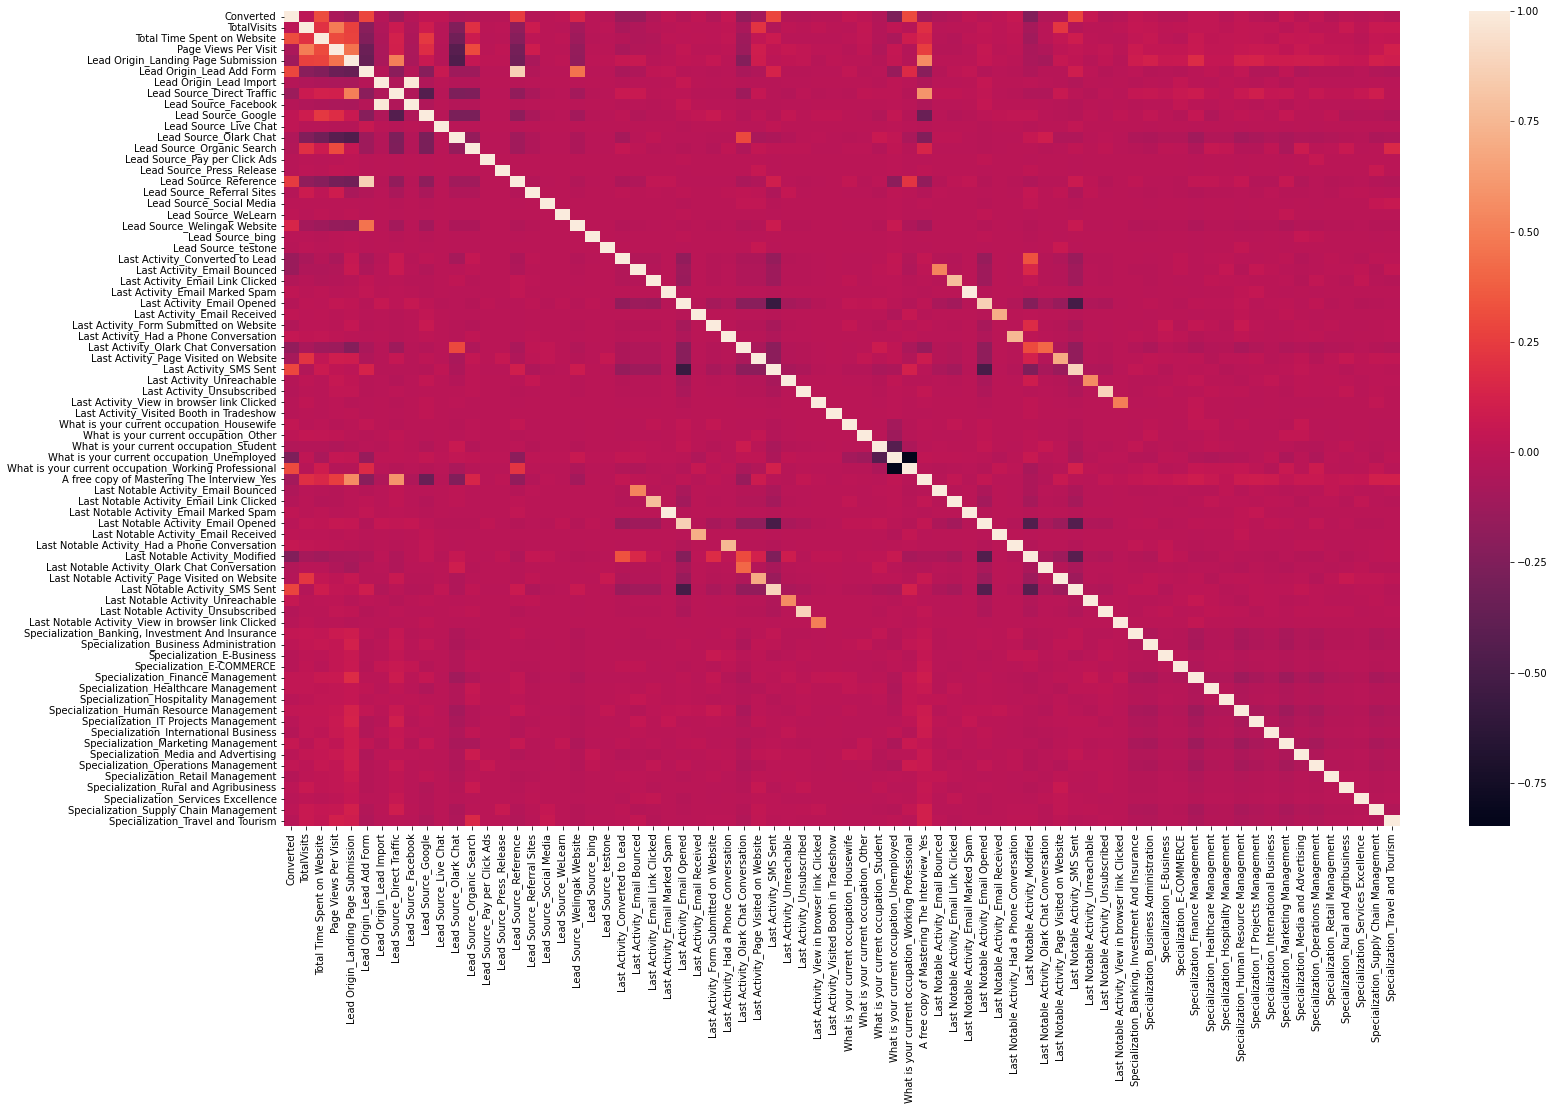

In [286]:
# Looking at the correlation table
import matplotlib.pyplot as plt

plt.figure(figsize = (25,15))
sns.heatmap(leads_data.corr())
plt.show()

In [287]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [288]:
y_train

8003    0
218     0
4171    1
4037    1
3660    1
       ..
8759    1
100     0
5877    0
8658    0
8217    0
Name: Converted, Length: 4461, dtype: int64

In [289]:
X_train.isnull().sum()

TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Lead Origin_Landing Page Submission       0
Lead Origin_Lead Add Form                 0
                                         ..
Specialization_Retail Management          0
Specialization_Rural and Agribusiness     0
Specialization_Services Excellence        0
Specialization_Supply Chain Management    0
Specialization_Travel and Tourism         0
Length: 73, dtype: int64

In [290]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation'

In [291]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(estimator = logreg, n_features_to_select =15)          
rfe = rfe.fit(X_train, y_train)


In [292]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 51),
 ('Total Time Spent on Website', False, 55),
 ('Page Views Per Visit', False, 49),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 25),
 ('Lead Source_Direct Traffic', False, 21),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_Olark Chat', False, 54),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Pay per Click Ads', False, 30),
 ('Lead Source_Press_Release', False, 40),
 ('Lead Source_Reference', False, 32),
 ('Lead Source_Referral Sites', False, 52),
 ('Lead Source_Social Media', False, 59),
 ('Lead Source_WeLearn', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 20),
 ('Lead Source_testone', False, 33),
 ('Last Activity_Converted to Lead', False, 28),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 50),
 ('L

In [293]:
col = X_train.columns[rfe.support_]

In [294]:

X_train = X_train[col]

In [295]:
X_train

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable,"Specialization_Banking, Investment And Insurance",Specialization_Marketing Management,Specialization_Rural and Agribusiness
8003,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
218,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4171,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4037,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3660,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5877,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
8658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [296]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


def vif(x_data):
    vif = pd.DataFrame()
    vif['Features'] = x_data.columns
    vif['VIF'] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

def train_logistic_model(x_data,y_data):
     x_data_sm = sm.add_constant(x_data)
     log_model = sm.GLM(y_data,x_data_sm,family = sm.families.Binomial())
     result = log_model.fit()
     print(result.summary())

     result = log_model.fit()

     variance_inflation = vif(x_data)
     print(variance_inflation)
     return result

In [297]:
result = train_logistic_model(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2401.4
Date:                Fri, 11 Aug 2023   Deviance:                       4802.8
Time:                        16:39:52   Pearson chi2:                 4.58e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2653
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### drop columns due to high p values

In [298]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [299]:
result =  train_logistic_model(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2403.6
Date:                Fri, 11 Aug 2023   Deviance:                       4807.2
Time:                        16:39:52   Pearson chi2:                 4.59e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2646
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [300]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [301]:
result =  train_logistic_model(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2404.9
Date:                Fri, 11 Aug 2023   Deviance:                       4809.7
Time:                        16:39:52   Pearson chi2:                 4.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2642
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### all the VIFS and p-values are in acceptable range , we go next to predict the model 

In [302]:
y_train_pred = result.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.591997
218     0.190772
4171    0.190772
4037    0.360335
3660    0.959227
207     0.190772
2044    0.190772
6411    0.823087
6498    0.076291
2085    0.986253
dtype: float64

In [303]:
y_train_pred_final = pd.DataFrame({'Lead_Converted':y_train.values, 'Lead_Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Lead_Converted,Lead_Conversion_Prob
8003,0,0.591997
218,0,0.190772
4171,1,0.190772
4037,1,0.360335
3660,1,0.959227


In [304]:
y_train_pred_final['Lead_Predicted'] = y_train_pred_final.Lead_Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

now we evaluate the model , and try to identify a cut off which makes momre sense 

In [306]:
from sklearn import metrics


def evalute_model(y_data , y_data_predicted):
        confusion = metrics.confusion_matrix(y_data , y_data_predicted )
        print(confusion)
        print(metrics.accuracy_score(y_data, y_data_predicted))
        TP = confusion[1,1] # true positive 
        TN = confusion[0,0] # true negatives
        FP = confusion[0,1] # false positives
        FN = confusion[1,0] # false negatives


        ### sensitivity 
        print('sensitivity :' , TP/(TP+FN))

        ### specificity
        TN/(TN+FP)
        print('specifity :' , TP/(TP+FN))


        # y_train_pred_final.Lead_Converted, y_train_pred_final.Lead_Predicted


In [307]:
evalute_model(y_train_pred_final.Lead_Converted, y_train_pred_final.Lead_Predicted)

[[1853  459]
 [ 776 1373]]
0.7231562429948442
sensitivity : 0.6389018147975802
specifity : 0.6389018147975802


as we can see the model is poor for the default cut off

In [308]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [309]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead_Converted, y_train_pred_final.Lead_Conversion_Prob, drop_intermediate = False )

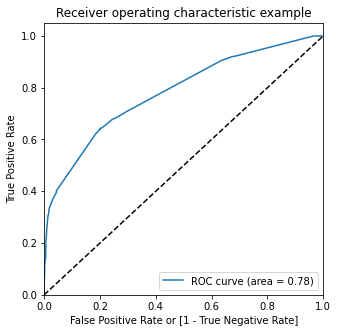

In [310]:
draw_roc(y_train_pred_final.Lead_Converted, y_train_pred_final.Lead_Conversion_Prob)

In [311]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead_Converted,Lead_Conversion_Prob,Lead_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
8003,0,0.591997,1,1,1,1,1,1,1,0,0,0,0
218,0,0.190772,0,1,1,0,0,0,0,0,0,0,0
4171,1,0.190772,0,1,1,0,0,0,0,0,0,0,0
4037,1,0.360335,0,1,1,1,1,0,0,0,0,0,0
3660,1,0.959227,1,1,1,1,1,1,1,1,1,1,1


In [312]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead_Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.500336  0.999069  0.036765
0.2   0.2  0.607039  0.922289  0.314014
0.3   0.3  0.623179  0.908329  0.358131
0.4   0.4  0.713965  0.684504  0.741349
0.5   0.5  0.723156  0.638902  0.801471
0.6   0.6  0.689531  0.404374  0.954585
0.7   0.7  0.679220  0.366217  0.970156
0.8   0.8  0.665098  0.322941  0.983131
0.9   0.9  0.637301  0.256864  0.990917


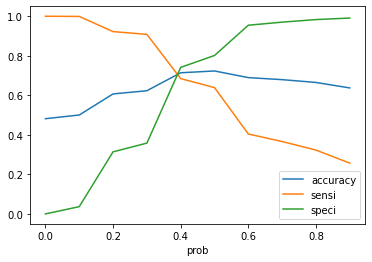

In [313]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

as we can see 0.4 looks like a better cut off compared to 0.5 , lets build a model around 0.4 and evaluate it

In [315]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

evalute_model(y_train_pred_final.Lead_Converted, y_train_pred_final.final_predicted)

we are able to find a better cut off at 0.4 , lets go ahead and build the model on train data and evaluate it 

In [316]:
X_test = X_test[col ]


In [317]:
X_test.drop('What is your current occupation_Housewife', axis = 1, inplace = True)


X_test.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [318]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = result.predict(sm.add_constant(X_test))
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,0
0,1,0.997037
1,0,0.360335
2,0,0.591997
3,1,0.591997
4,1,0.377807


In [319]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Lead_Conversion_Prob'})
y_pred_final['final_predicted'] = y_pred_final.Lead_Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [320]:
evalute_model(y_pred_final.Converted, y_pred_final.final_predicted)

[[709 287]
 [290 626]]
0.6982217573221757
sensitivity : 0.6834061135371179
specifity : 0.6834061135371179


We can see that our model is consistent with the train model with 0.4 cut off

we check the precision recall curve against our data

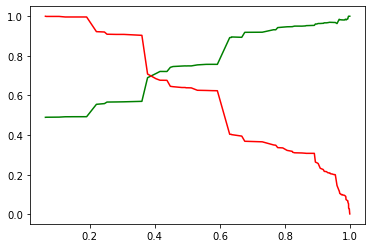

In [321]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Lead_Converted, y_train_pred_final.Lead_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Lead_Converted, y_train_pred_final.Lead_Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

for us the threshold still stands at 0.4


### Conclusion
#### we use of features like below:

• Lead Origin_Lead Add Form  
• Last Activity_Had a Phone Conversation 
• Specialization_Banking, Investment And Insurance Marketing Management ,Rural and Agribusiness' can be used as hot leads , which can be quickly converted . 
These leads need to be curated well to achieve better conversion , on top we have some features which would reduce our conversion , we need to pay closer attention to these leads . We can add new features to the Specializations which can boost our lead conversion